In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [19]:
df = pd.read_csv("../xgboost-used/common_diseases.csv")
df

,Date,Disease,Frequency,Average Age,StdDev Age,Subdistrict
0,2015-01-06,J18.0,1,10.0,0.0,5
1,2015-01-12,J18.0,1,6.0,0.0,5
2,2015-01-19,J18.0,1,1.0,0.0,4
3,2015-01-23,J18.0,1,3.0,0.0,2
4,2015-01-26,J18.0,1,56.0,0.0,3
...,...,...,...,...,...,...
24667,2024-12-16,N39.0,2,50.5,26.5,2
24668,2024-12-18,N39.0,1,40.0,0.0,3
24669,2024-12-22,N39.0,1,48.0,0.0,5
24670,2024-12-23,N39.0,2,2.5,0.5,5


## Heatmap Analisis 10 Penyakit Terbanyak Pasien Rawat Inap (2015-2024)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32672\3530391485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['Month'] = df_top10['Date'].dt.to_period('M').astype(str)


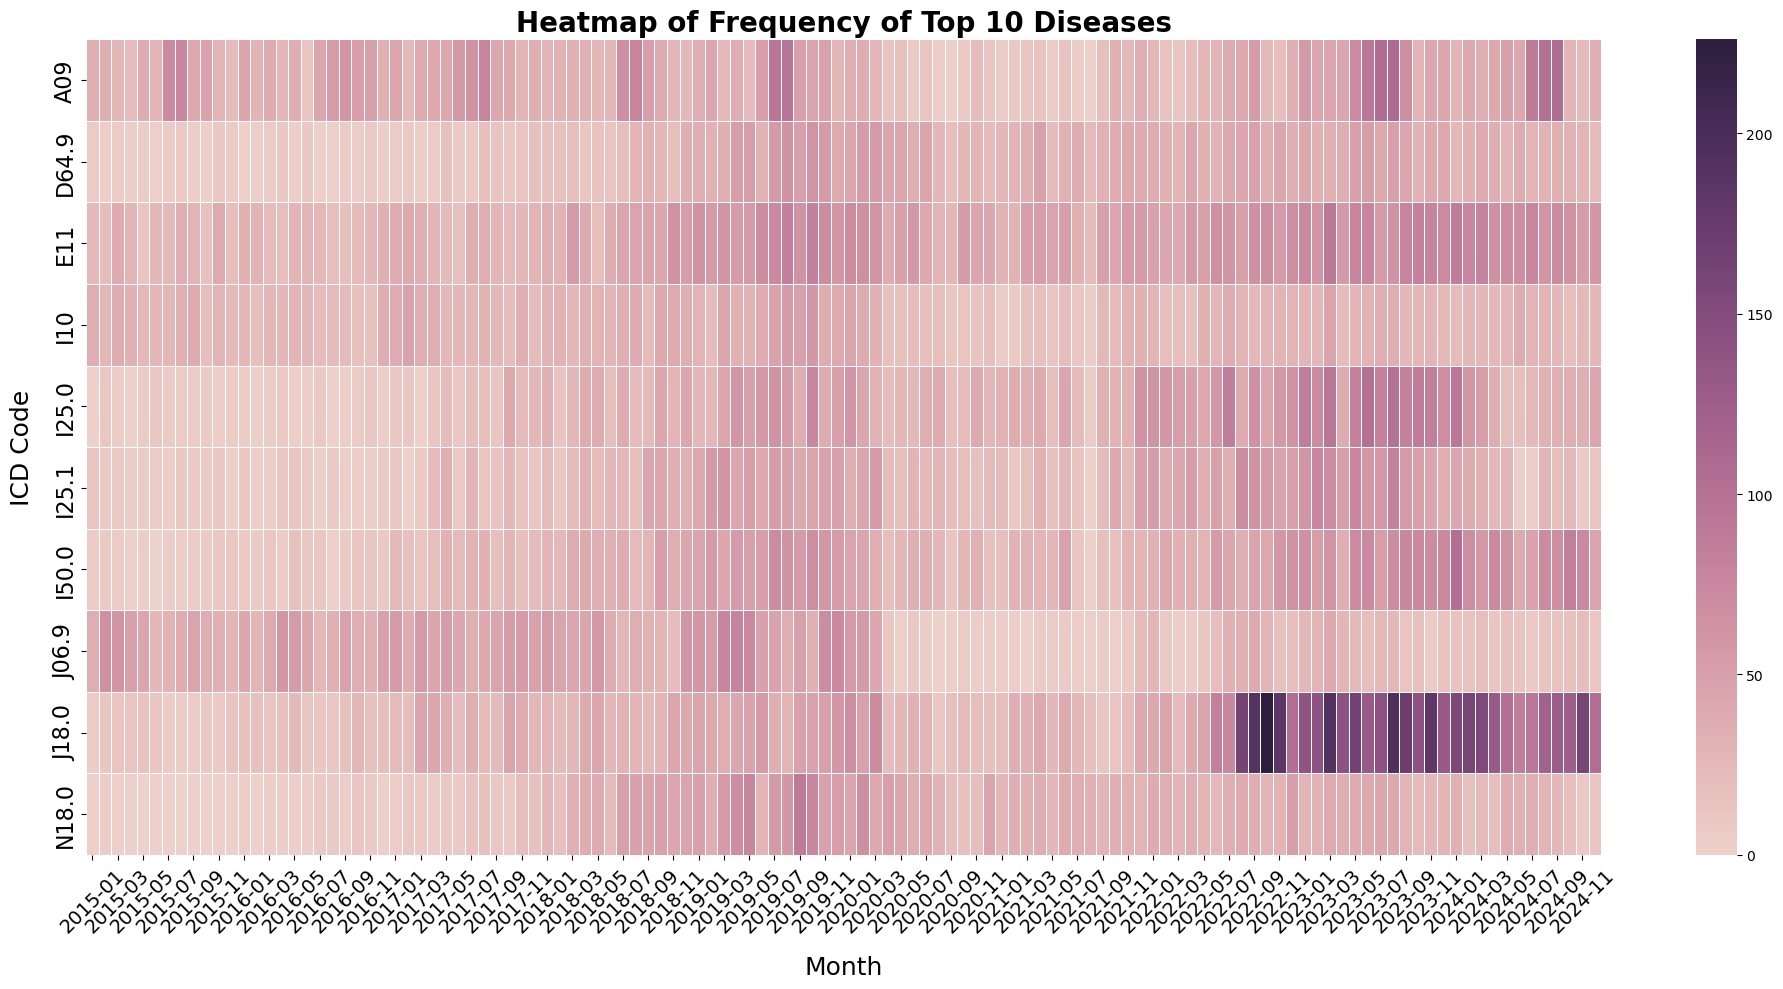

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

df_filtered = df[df["Disease"] != "B34.2"]

top10 = df_filtered.groupby('Disease')['Frequency'].sum().nlargest(10).index
df_top10 = df_filtered[df_filtered['Disease'].isin(top10)]

df_top10['Month'] = df_top10['Date'].dt.to_period('M').astype(str)

heatmap_data = df_top10.pivot_table(index='Disease', columns='Month', values='Frequency', aggfunc='sum', fill_value=0)


fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    heatmap_data,
    cmap= sns.cubehelix_palette(as_cmap=True),
    linewidths=0.5,
    linecolor='white'
)

ax.set_title("Heatmap of Frequency of Top 10 Diseases", fontsize=20, fontweight='bold')
ax.set_xlabel("Month", fontsize=18, labelpad=14)
ax.set_ylabel("ICD Code", fontsize=18, labelpad=14)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


# Plot 10 Penyakit Terbanyak Pasien Rawat Inap RS Pertamina Balikpapan (2015-2024)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32672\3674623004.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(diseases, fontsize=17)


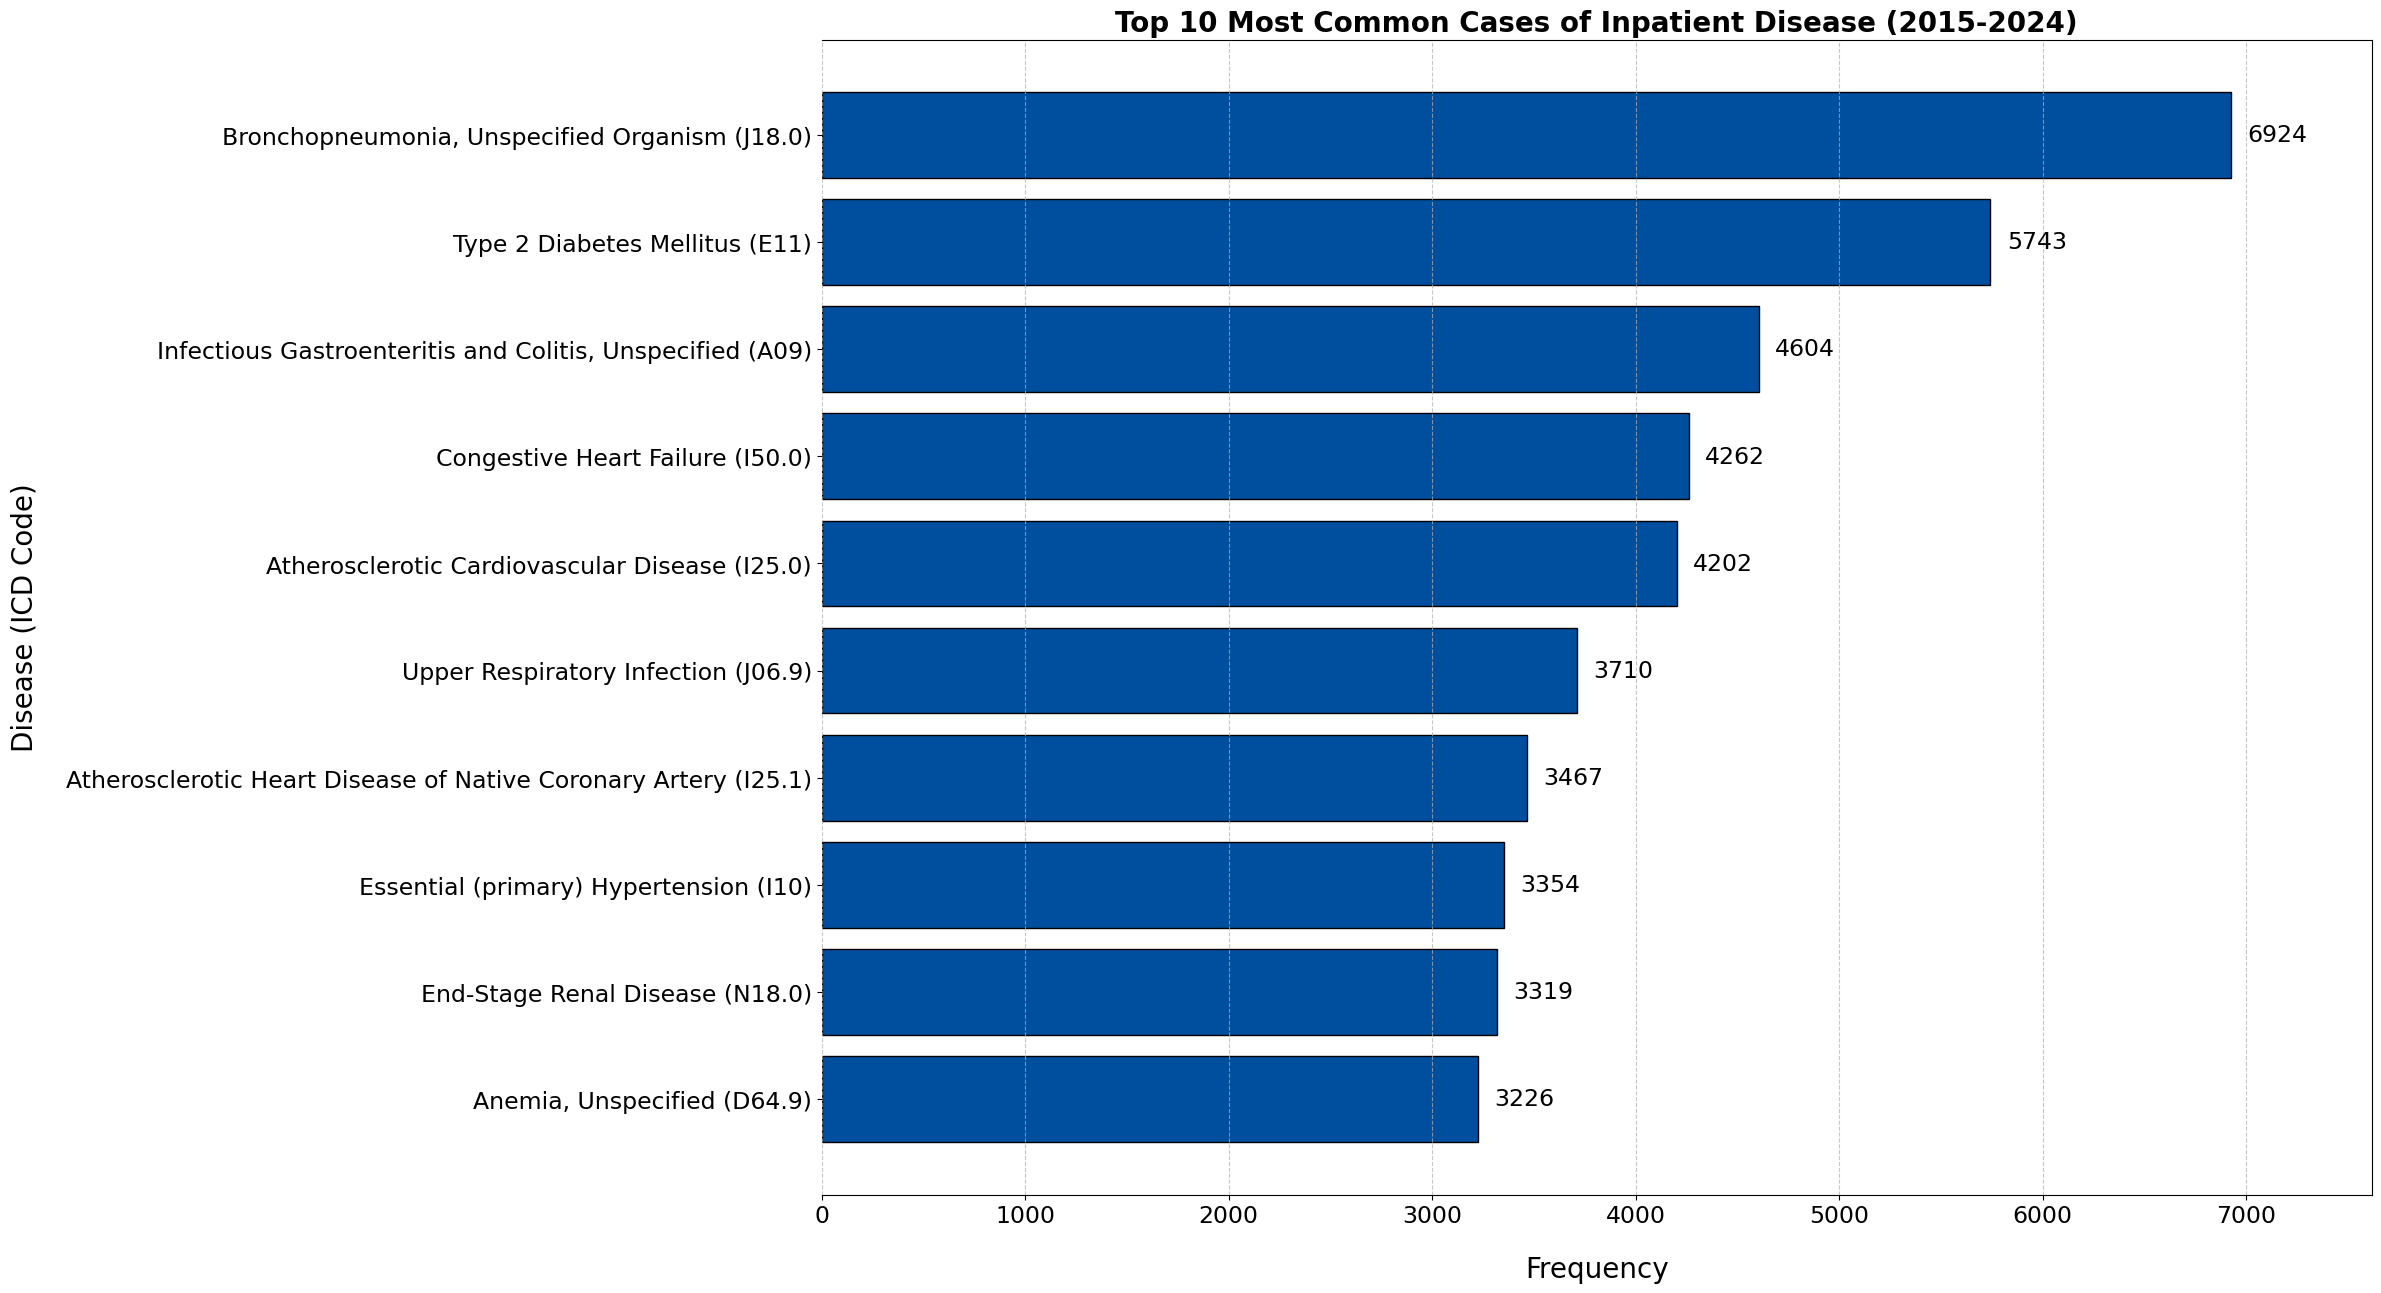

In [21]:
sort_icd_freq = {
    'Bronchopneumonia, Unspecified Organism (J18.0)': 6924,
    'Type 2 Diabetes Mellitus (E11)': 5743,
    'Infectious Gastroenteritis and Colitis, Unspecified (A09)': 4604,
    'Congestive Heart Failure (I50.0)': 4262,
    'Atherosclerotic Cardiovascular Disease (I25.0)': 4202,
    'Upper Respiratory Infection (J06.9)': 3710,
    'Atherosclerotic Heart Disease of Native Coronary Artery (I25.1)': 3467,
    'Essential (primary) Hypertension (I10)': 3354,
    'End-Stage Renal Disease (N18.0)': 3319,
    'Anemia, Unspecified (D64.9)': 3226
}

diseases = list(sort_icd_freq.keys())
frequencies = list(sort_icd_freq.values())

fig, ax = plt.subplots(figsize=(20, 15), dpi=100)
bars = ax.barh(diseases, frequencies, color='#004F9E', edgecolor='black')

for bar, freq in zip(bars, frequencies):
    ax.text(bar.get_width() + 80, bar.get_y() + bar.get_height()/2, 
            str(freq), ha='left', va='center', fontsize=17)

ax.set_xlabel('Frequency', fontsize=20, labelpad=20)
ax.set_ylabel('Disease (ICD Code)', fontsize=20, labelpad=20)
ax.set_title('Top 10 Most Common Cases of Inpatient Disease (2015-2024)', fontsize=20, fontweight='bold')

ax.set_yticklabels(diseases, fontsize=17)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):}'))
ax.tick_params(axis='x', labelsize=17)

ax.invert_yaxis()  
ax.grid(axis='x', linestyle='--', alpha=0.7)

ax.spines['left'].set_visible(False)

max_freq = max(frequencies)
ax.set_xlim(0, max_freq * 1.1)

plt.show()


## Prediksi Jumlah Kasus Penyakit Terbanyak Pasien Rawat Inap RS Pertamina Balikpapan (Januari - Mei 2025)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32672\523639823.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(diseases, fontsize=18)


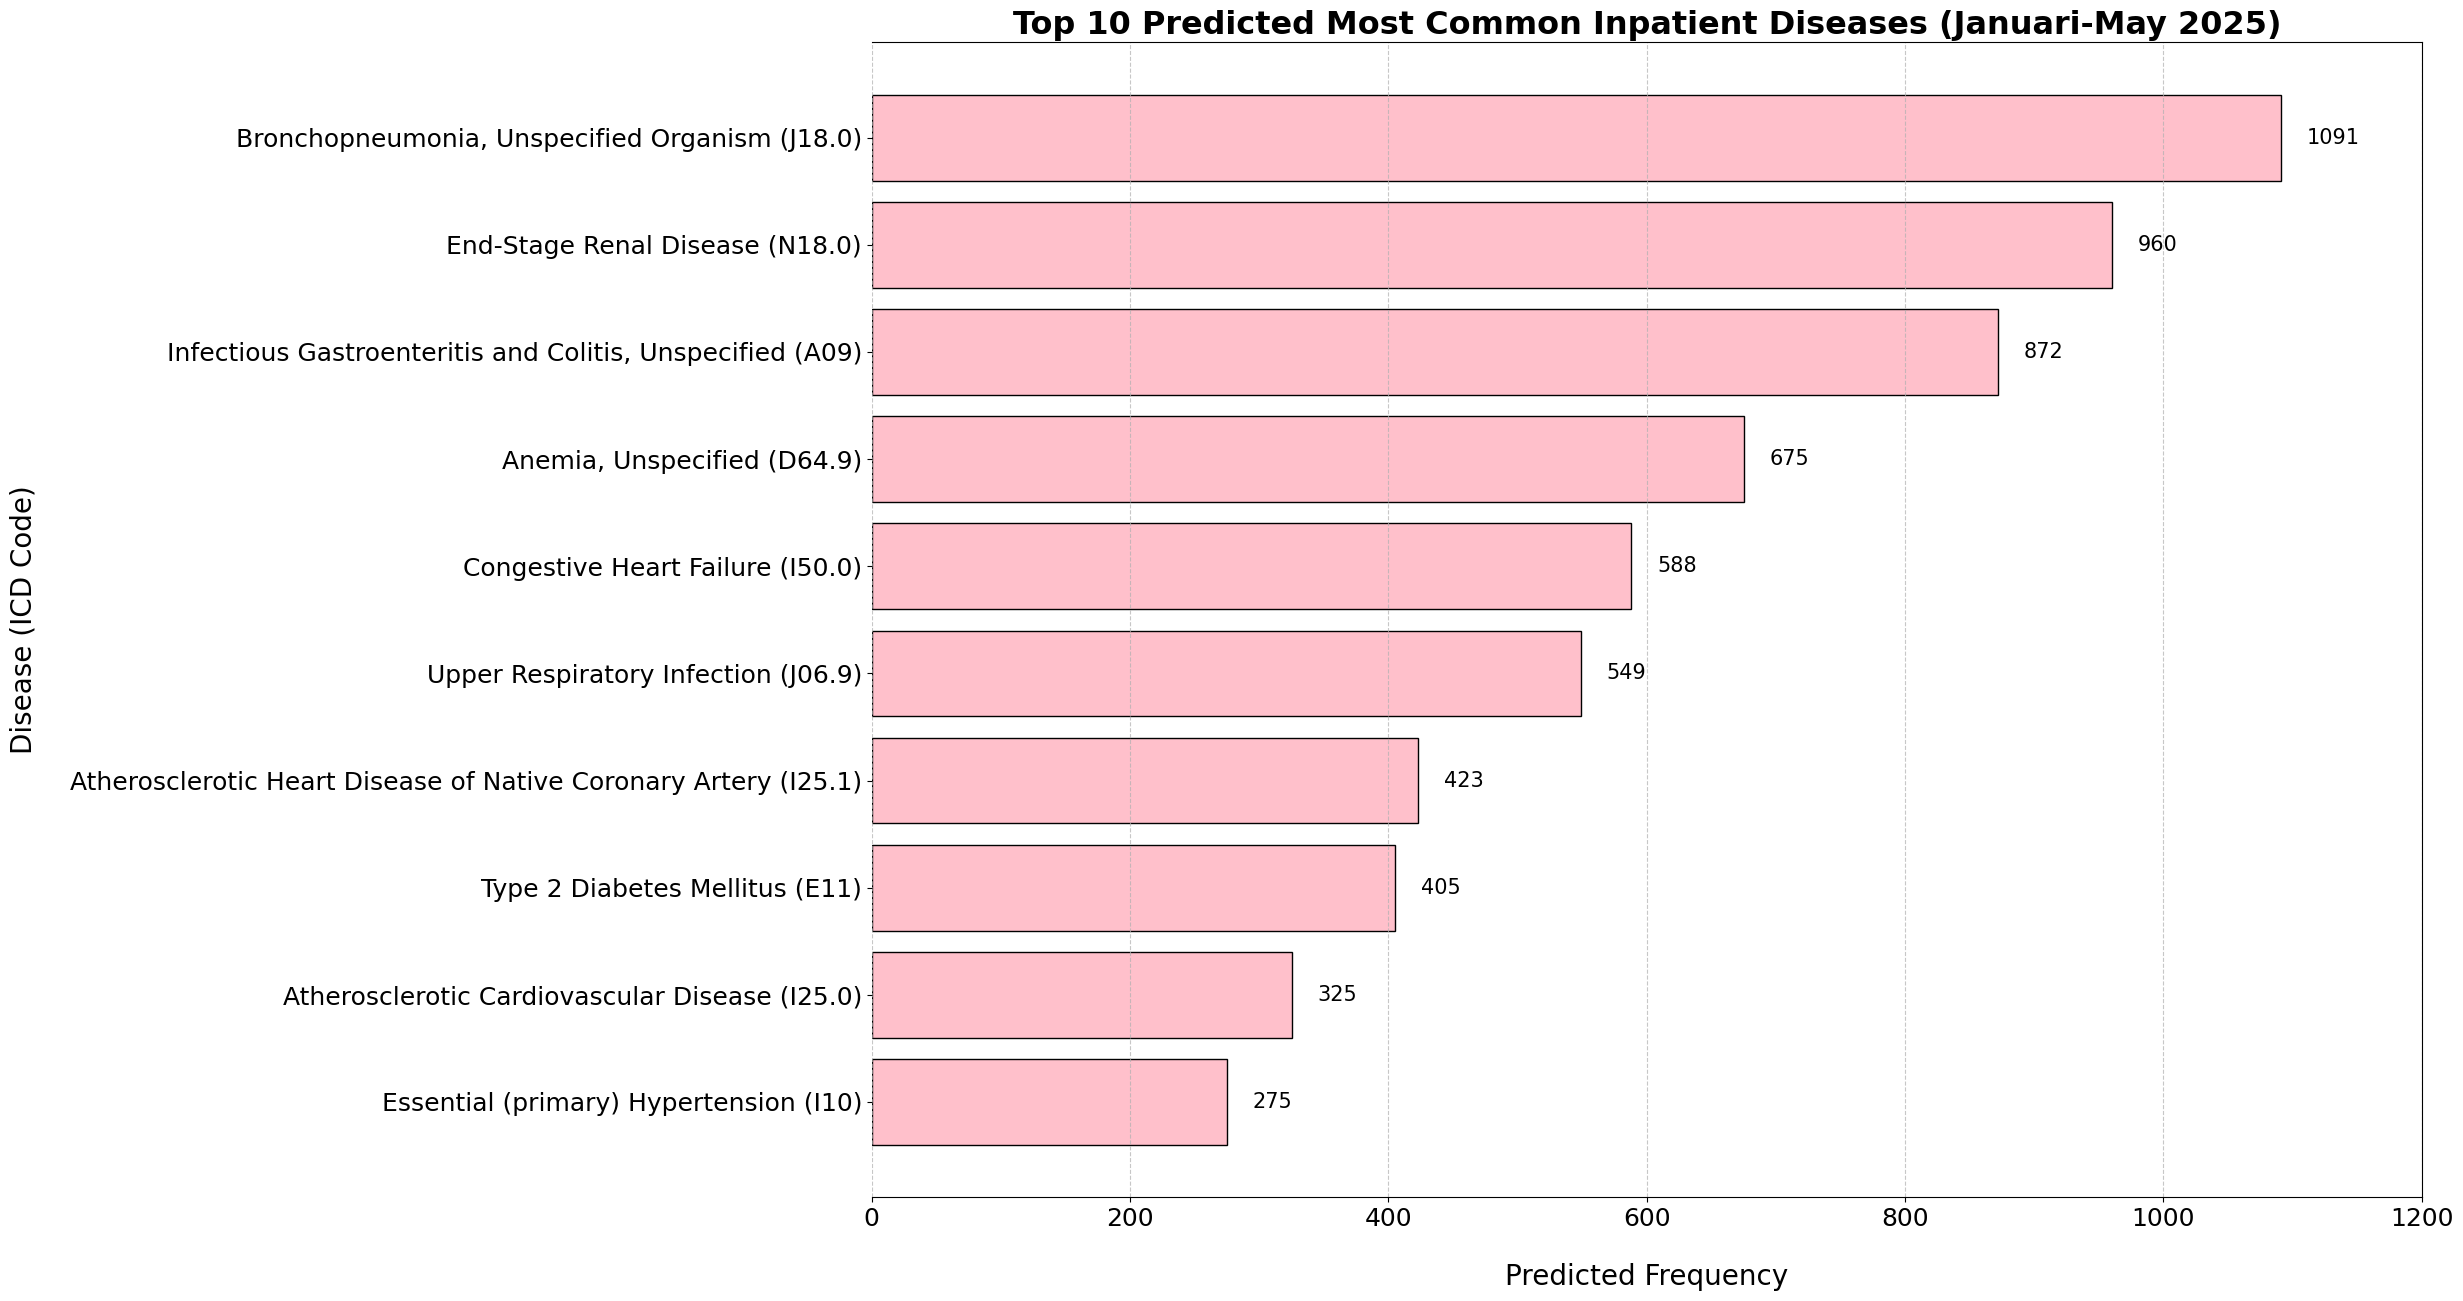

In [ ]:
final = {
    'Bronchopneumonia, Unspecified Organism (J18.0)': 1091,
    'End-Stage Renal Disease (N18.0)': 960,
    'Infectious Gastroenteritis and Colitis, Unspecified (A09)': 872,
    'Anemia, Unspecified (D64.9)': 675,
    'Congestive Heart Failure (I50.0)': 588,
    'Upper Respiratory Infection (J06.9)': 549,
    'Atherosclerotic Heart Disease of Native Coronary Artery (I25.1)': 423,
    'Type 2 Diabetes Mellitus (E11)': 405,
    'Atherosclerotic Cardiovascular Disease (I25.0)': 325,
    'Essential (primary) Hypertension (I10)': 275
}

diseases = list(final.keys())
frequencies = list(final.values())

fig, ax = plt.subplots(figsize=(20, 15), dpi=100)
bars = ax.barh(diseases, frequencies, color='pink', edgecolor='black')

for bar, freq in zip(bars, frequencies):
    ax.text(bar.get_width() + 20, bar.get_y() + bar.get_height()/2, 
            str(freq), ha='left', va='center', fontsize=15)

ax.set_xlabel('Predicted Frequency', fontsize=20, labelpad=23)
ax.set_ylabel('Disease (ICD Code)', fontsize=20, labelpad=23)
ax.set_title('Top 10 Predicted Most Common Inpatient Diseases (Januari-May 2025)', 
             fontsize=23, fontweight='bold')

ax.set_yticklabels(diseases, fontsize=18)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):}'))
ax.tick_params(axis='x', labelsize=18)

ax.invert_yaxis()  
ax.grid(axis='x', linestyle='--', alpha=0.7)

ax.spines['left'].set_visible(False)

max_freq = max(frequencies)
ax.set_xlim(0, max_freq * 1.1)

plt.show()

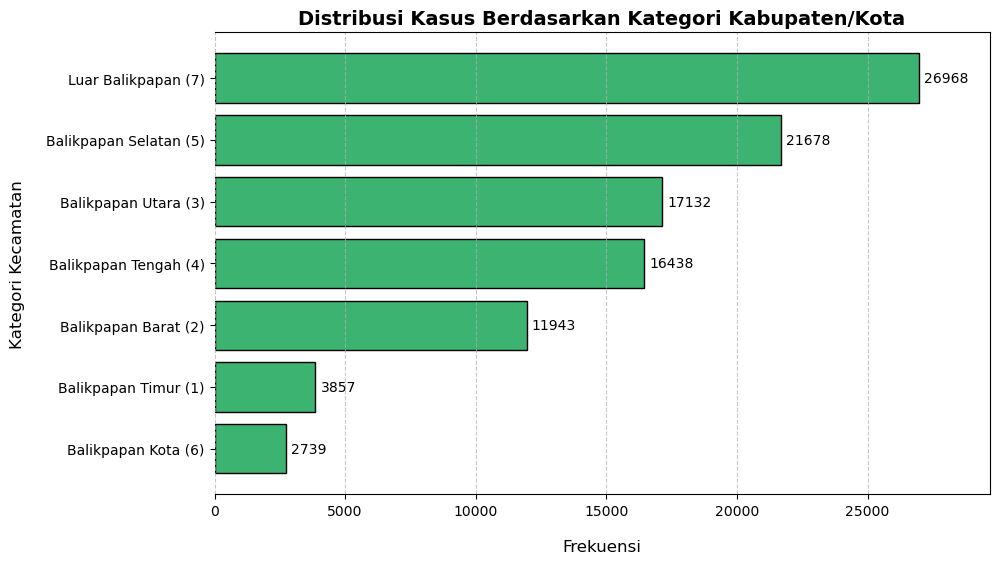

In [46]:
kategori_kecamatan = {
    "Luar Balikpapan (7)": 26968,
    "Balikpapan Selatan (5)": 21678,
    "Balikpapan Utara (3)": 17132,
    "Balikpapan Tengah (4)": 16438,
    "Balikpapan Barat (2)": 11943,
    "Balikpapan Timur (1)": 3857,
    "Balikpapan Kota (6)": 2739
}

kecamatan = list(kategori_kecamatan.keys())
frekuensi = list(kategori_kecamatan.values())

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
bars = ax.barh(kecamatan, frekuensi, color='mediumseagreen', edgecolor='black')

for bar, freq in zip(bars, frekuensi):
    ax.text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2, 
            str(freq), ha='left', va='center', fontsize=10)

ax.set_xlabel('Frekuensi', fontsize=12, labelpad=15)
ax.set_ylabel('Kategori Kecamatan', fontsize=12, labelpad=15)
ax.set_title('Distribusi Kasus Berdasarkan Kategori Kabupaten/Kota', fontsize=14, fontweight='bold')

ax.invert_yaxis()  
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.spines['left'].set_visible(False)

max_freq = max(frekuensi)
ax.set_xlim(0, max_freq * 1.1)

plt.show()
